### Data Pre-processing

Plan:
1. **Introduction**
   - Importance of data preprocessing
   - Types of data preprocessing
2. **Image data preprocessing**
   - Data loading
   - EDA and Viz
   - Data transformation
     - Normalization and standardization
   - Data augmentation
     - Rotation, flipping, scaling, cropping, etc.

### **1. Introduction**

**Pre-processing** is a step in a machine learning pipeline that takes raw data as an input and transforms it to make it suitable for consequent steps such as train a model.

It is applied before other processing steps, hence the name is ‘pre-processing’. It is always important to split your data into training and testing before any preprocessing.

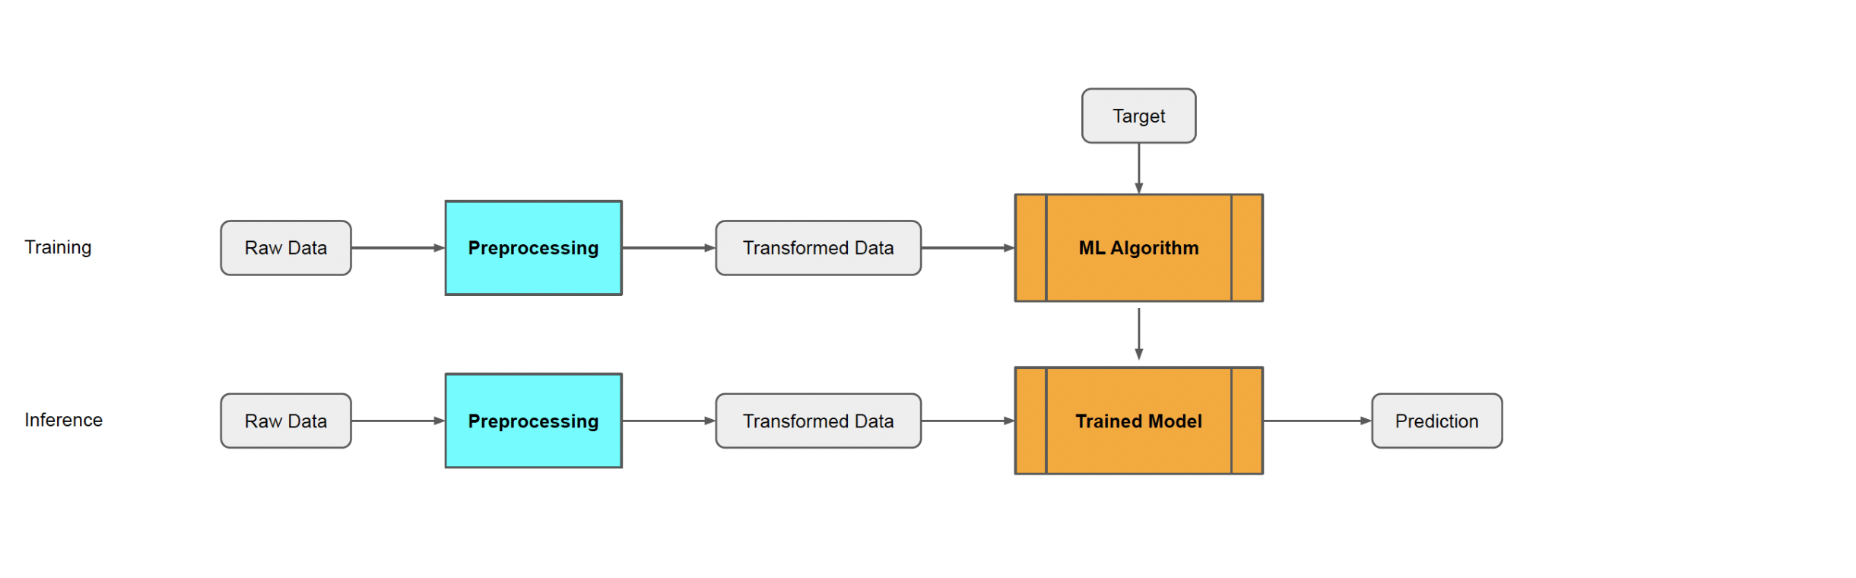

Machine learning models learn a pattern from the data. A cleaned and preprocessed data would usually improve the accuracy, reduce the time and resources required to converge the model, and prevent overfitting.

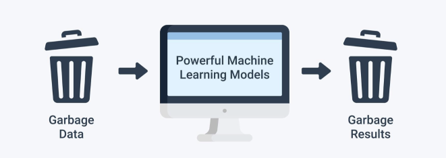

Types of data preprocessing:

- **Data cleaning**
  - **Handling missing values** (filling in or removing data points with missing values)
  - **Removing outliers** (identifying and excluding outliers that could skew model training)
- **Feature engineering**
  - **Feature extraction** (deriving new features from the existing data that are more suitable for model training)
  - **Feature encoding** (converting categorical data into numerical format, such as one-hot encoding)
- **Data transformation**
  - **Normalization and standardization** (scaling data to a standard range or distribution, like zero mean and unit variance)
  - **Feature scaling** (adjusting the scale of features to a similar range to ensure equal contribution to the model's performance)
- **Data augmentation** - creating synthetic data from the existing dataset by applying transformations; can only used in training but not evaluation
  - **Rotation, flipping, scaling, cropping, etc.** (for images)


### **2. Image data preprocessing**

In [ ]:
# Import libraries


#### **Data loading (We will use some open source images from Lorem Picsum)**

It is easy when working with images of same dimensions. Hence we will resize the downloaded images. This could be done using a pytorch resize transformation but here we will use a function to do it so we can appreciate how learning about the available transformations in pytorch can help save you time.

In [ ]:
# Function to resize an image




In [ ]:
# Define the directories containing the images




In [ ]:
# Size for resizing




In [ ]:
# Resizing




#### **EDA and Viz**

In [ ]:
DATA_DIR   = './lorem_data/'

## Pytorch simplifies the creation of image datasets
# We apply a transform toTensor which converts the images to pytorch tensors






In [ ]:
## A snapshot of the data without any transformation or normalization
r, c = [1, 3]
fig, ax = plt.subplots(r, c, figsize=(15, 5))  \

k = 0
dtl_pure = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=3,)

for data in dtl_pure:
    x, y = data
    for j in range(c):
        img = x[k].numpy().transpose(1, 2, 0)
        ax[j].imshow(img)  # Adjusted indexing for one-dimensional ax
        ax[j].axis('off')
        k += 1
        if k >= 3:  # Break the loop after 3 images
            break
    break  # This will only execute the outer loop once

#### **Data transformation**

Here, we'll apply normalization and standardization to the images.

In [ ]:
#Here is a helper function to calculate the mean and standard deviation of the images
def get_mean_and_std(dataloader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0

    for data, _ in dataloader:
        # Sum over all batches, height, and width; keep the channel dimension
        channels_sum += torch.sum(data, dim=[0, 2, 3])
        channels_squared_sum += torch.sum(data ** 2, dim=[0, 2, 3])
        num_batches += data.shape[0]  # Add the batch size

    mean = channels_sum / (num_batches * dataloader.dataset[0][0].size(1) * dataloader.dataset[0][0].size(2))

    std = (channels_squared_sum / (num_batches * dataloader.dataset[0][0].size(1) * dataloader.dataset[0][0].size(2)) - mean ** 2) ** 0.5

    return mean, std

In [ ]:
# Define normalization transforms:




In [ ]:
# Apply normalization to datasets:




In [ ]:
# Display images 
def display_img(dtl_pure,dtl_transform):
    r, c = [2, 3]
    fig, ax = plt.subplots(r, c, figsize=(15, 10))

    for data in dtl_pure:
        x, y = data
        for j in range(c):
            img = x[j].numpy().transpose(1, 2, 0)
            ax[0, j].imshow(img)
            ax[0, j].axis('off')
        break  # Only take the first batch

    for data in dtl_transform:
        x, y = data
        for j in range(c):
            img = x[j].numpy().transpose(1, 2, 0)
            ax[1, j].imshow(img)
            ax[1, j].axis('off')
        break  # Only take the first batch

In [ ]:
# Display images 




#### **Data augmentation**

In this section, we'll apply data augmentation techniques to the training dataset.

How to apply them to our image dataset:

URL:
https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py \
Common Issue: \
```TypeError: Input tensor should be a torch tensor. Got <class
'PIL.Image.Image'>.``` \
—> Please check the sequencing of your transforms. Read the documentation and verify
the kind of input required.

#### Flip horizontally

In [ ]:
# Define data augmentation:




In [ ]:
# Apply augmentation to datasets:




In [ ]:
# Display images




#### Multiple augmentation strategies can be  combined

In [ ]:
# Define data augmentation:




In [ ]:
# Apply combination of transfroms :




In [ ]:
# Display images




### Not all augmentations are valid, 
you should understand the problem you are trying to solve and self evaluate if the augmentation you are applying will help. For example it does not make sense to do a vertical flip in a facial recognition problem except.

### Try flip vertically!!!